1) Importing the required liabraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

2) Reading the dataset or converting the excel/csv file into pandas dataframe

In [2]:
df=pd.read_csv("insurance.csv")

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


3) Display first five rows of the dataframe

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


4) Check last five rows from the datframe

In [5]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


3) Find Shape of Dataset(Number of rows and columns of dataframe)

In [6]:
df.shape
#here shape is not method its attribut so doesnot have ()
#here 1338 rows and 7 columns

(1338, 7)

In [7]:
print("Number of Rows",df.shape[0])
print("Number of Rows",df.shape[1])

Number of Rows 1338
Number of Rows 7


4) Get Information About Dataset. with df.info()

Like Total number of Rows, Total nuber of Columns

Datatypes of each column and Memory requirement

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


5) Check Null Values in the dataframe

In [9]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

6. Check for Duplicate values

as there are 0 null values we will check duplicates if any?

In [10]:
duplicate= df[df.duplicated()]
duplicate

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


Here we have one duplicate entry 

so we will derop this record with df.drop()

In [11]:
df=df.drop_duplicates()

In [12]:
#As we dropped out one entry rhe shape of dataframe changes 

df.shape

(1337, 7)

In [13]:
print("Number of Rows",df.shape[0])
print("Number of Rows",df.shape[1])

Number of Rows 1337
Number of Rows 7


7) Get overall Statistics abou the dataset

df.describe() will display the statistics for numerical column only

In [14]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


To display statistics for numerical column as wll as categorical column like sex,children,region,smoker
we will write include='all' in describe function

In [15]:
df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337,1337.000000,1337.000000,1337,1337,1337.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,675,NaN,NaN,1063,364,NaN
mean,39.222139,NaN,30.663452,1.095737,NaN,NaN,13279.121487
std,14.044333,NaN,6.100468,1.205571,NaN,NaN,12110.359656
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.290000,0.000000,NaN,NaN,4746.344000
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9386.161300
75%,51.000000,NaN,34.700000,2.000000,NaN,NaN,16657.717450


8) Encoding of categorical columns

Convert the Columns from string ['sex','smoker','region'] To numerical values

In [16]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [17]:
#converting the sex column into the numerical one

#here with help of unique method we are finding out unique values
#present in the sex column
#there are two unique values present in sex column are female and male

df['sex'].unique()

array(['female', 'male'], dtype=object)

In [18]:
#using map function we can encode these two values in sex column
#here map function assigns booolean values to female and male
#0 and 1 respectively
df['sex'].map({'female':0,'male':1})

0       0
1       1
2       1
3       1
4       1
       ..
1333    1
1334    0
1335    0
1336    0
1337    0
Name: sex, Length: 1337, dtype: int64

In [19]:
df['sex']=df['sex'].map({'female':0,'male':1})

In [20]:
#explore again the first five rows of dataframe
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [21]:
#converting the smoker column into the numerical one

#it has again two values as yes and no
df['smoker']=df['smoker'].map({'yes':1,'no':0})

In [22]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [23]:
#converting the region column into the numerical one

#first we are checking the unique values present in the region column
df['region'].unique()
#so there are total 4 unique values present in the region column

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [24]:
df['region']=df['region'].map({'southwest':1,'southeast':2, 
                               'northwest':3,'northeast':4})

In [25]:
#here we can see that the categorical column are converted into numerical one
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


9) Separation of feature (x) and target (y)

In [26]:
#for model training we have to store the dependent and 
#independent variable separately
# so firstly we are checking all the columns
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [27]:
#storing the independent variable in matrix x
X = df.drop(['charges'],axis=1)

In [28]:
#checking the independent matrix
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,1
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,3
4,32,1,28.880,0,0,3
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3
1334,18,0,31.920,0,0,4
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,1


In [29]:
#store the dependent varian=ble that is charges into y
y = df['charges']

In [30]:
#cheking dependent vatiable or target value
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64

Here the X is the matrix and y is the vector (case doesn't matter)
X = Feature and y = target

10) Train/Test Split (to evaluate performance of the matrix)

1.Split data into two part: a taining set and testing set
    
2.Train the model(s) on training set

3.Test the model(s) on testing set

In [31]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=1)

In [32]:
#here we are going to ntain our model on Xtrain and ytrain 
#we are testing our model on Xtest
#and we are comparing the model with ytest
#to make the samples remain same in every run 
#we are usning the random state- generate the seme sequence of rnadom values
#the value of random state can be any value 1/ 42 any thing 
#but should be same 

11) Import the models

In [33]:
#since its a regression problem we are using wildely used 
#regression models

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

12) Model Training

In [34]:
#fit method for model taring using the object of the imported model

lr = LinearRegression()
lr.fit(Xtrain,ytrain)

svm = SVR()
svm.fit(Xtrain,ytrain)

rf = RandomForestRegressor()
rf.fit(Xtrain,ytrain)

gr = GradientBoostingRegressor()
gr.fit(Xtrain,ytrain)

GradientBoostingRegressor()

13) Prediction on Test Data

In [35]:
#here we are using Xtest for prediction on test data
#these are unseen random samples

#testing done for lr(linearRegrssion)
ypred1 = lr.predict(Xtest)

#testing done for svm(Support Vector Machine)
ypred2 = svm.predict(Xtest)

#testing done for rf(Random Forest regressor)
ypred3 = rf.predict(Xtest)

#testing done for gr(GradientBoostingRegressor)
ypred4 = gr.predict(Xtest)


In [36]:
#compare the predicted values with ytest
#so we create the new dataframe

df1 = pd.DataFrame({'Actual':ytest, 'Lr':ypred1, 'svm':ypred2,
                  'rf':ypred3, 'gr':ypred4})

In [37]:
#we are getting actual vs predicted values for all models
df1

,Actual,Lr,svm,rf,gr
629,42983.45850,36152.195044,9554.356521,47649.402112,45272.807924
1087,11353.22760,12643.629723,9627.252212,12302.742660,11985.848977
283,11879.10405,13905.380251,9617.515625,13180.258553,13599.579676
790,5662.22500,12043.050328,9525.040135,11531.862769,8694.165981
594,5709.16440,11453.743527,9536.113294,6554.340621,6019.572106
...,...,...,...,...,...
1164,7153.55390,8428.932170,9529.728990,6832.283683,7898.659954
962,14474.67500,16315.397286,9652.344646,24982.408797,16976.512133
1158,2459.72010,3656.191057,9430.955273,4465.552280,4363.147186
1241,49577.66240,40831.804143,9655.156264,47678.348693,47873.578216


14) Compare performance Visually

In [38]:
#to get the best model we compare the models visually

#for visualization we are importing matplotlib library

import matplotlib.pyplot as plt

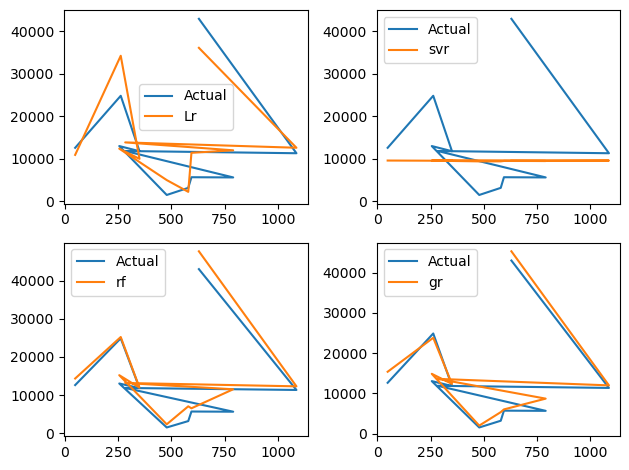

In [39]:
#so visualize all four models we are uing the subplot

plt.subplot(221)# the 221 represents 2rows 2columns and 1st subplot
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['Lr'].iloc[0:11],label='Lr')
plt.legend()

#here in the graph actual values are blue color 
#and  predicted ones are orange color
#since it is difficut to visualize we are using iloc 0:11 
#that means first 10 values for proper visualization

plt.subplot(222)# the 222 represents 2rows 2columns and 2nd subplot
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['svm'].iloc[0:11],label='svr')
plt.legend()

plt.subplot(223)# the 223 represents 2rows 2columns and 3rd subplot
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['rf'].iloc[0:11],label='rf')
plt.legend()

plt.subplot(224)# the 2214 represents 2rows 2columns and 4th subplot
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['gr'].iloc[0:11],label='gr')
plt.legend()

plt.tight_layout()# to fit the plots in specified region



In [40]:
#here from the above graphs we found out that graph 3 & 4 are
#closer to actual values
#graph 1 & 2 values are not closer to actual values comparef to 3 & 4 
#model 2 shows some contant values
# but when we compare model 3 and model 4 model 4 is better than model 3


15) Evaluating the Algorithms

In [41]:
#here to have best model out of 4 we are evaluating the algorithms
#using  R^2; the R^2 is used to measure goodness of fit;
#greater the value of R^2 better the result of model
#so we import the evaluation metrics

In [42]:
from sklearn import metrics

In [43]:
score1 = metrics.r2_score(ytest,ypred1)
score2 = metrics.r2_score(ytest,ypred2)
score3 = metrics.r2_score(ytest,ypred3)
score4 = metrics.r2_score(ytest,ypred4)

In [44]:
print(score1,score2,score3,score4)

0.7526116094775537 -0.03766986416638374 0.8257519031023629 0.8617316874150376


In [45]:
#from above r2 score we can see that model 4 
#(with score as 0.8616724509617877)
#is performing better than any other model

In [46]:
#we can use othe matrix for model evaluation like (MSE)

s1 = metrics.mean_absolute_error(ytest,ypred1)
s2 = metrics.mean_absolute_error(ytest,ypred2)
s3 = metrics.mean_absolute_error(ytest,ypred3)
s4 = metrics.mean_absolute_error(ytest,ypred4)

In [47]:
print(s1,s2,s3,s4)

3901.9269124279517 7405.39383684354 2634.355775276604 2355.3706157125293


In [48]:
#the Mean absolue error(MSE) is used to evaluate the 
#performance of the regression model
#here lower value of MSE is better the performance of the model
#model 4 has s4 value which is lowest mong all that is 2357.0903615464713

From all the above evaluation we can conclude that model 4 is the best model

so for this dataset we are going to use model 4(GradientBoostingRegressor)  for prediction & model deployment

16) Predict Charges for New Customer

In [49]:
#Assuming that we are getting the data from new customer as pandas dataframe
#here we are creating pandas dataframe with PYTHON Dictionary

data = {'age':40,
     'sex':1,
     'bmi':40.30,
     'children':4,
     'smoker':1,
     'region':2}

df = pd.DataFrame(data,index=[0])
df

,age,sex,bmi,children,smoker,region
0,40,1,40.3,4,1,2


In [50]:
#Now we predict the charges based on available data
#for prediction we are going to use model 4 as Gradient Boosting Regressor

new_pred = gr.predict(df)
print(new_pred)

[41920.60789277]


17) Save Model Using Joblib

In [51]:
#this stage can be called as Deployment
#before deployment first we have to train our model on entire dataset
#since erlier we found out that Gradient Boosting Regressor is best model

gr = GradientBoostingRegressor()
gr.fit(X,y)


GradientBoostingRegressor()

# Joblib Library: Joblib is a set of tools to provide lightweight pipelining in Python. 

The use of this library, is to provide tools to easily achieve better performance 

and reproducibility when working with long running jobs.  

which in turn helps to 

1) Avoid computing the same thing twice
2) Persist to disk transparently: efficiently persisting arbitrary objects 
    containing large data is hard.
    

In [52]:
#this model we need to save so 
#again and again training and testing is not required
# so we import joblib library

import joblib

In [53]:
joblib.dump(gr,'model_joblib_gr') #model saving

['model_joblib_gr']

In [54]:
#using above model we can perform prediction
#creating a variable  for model

model = joblib.load('model_joblib_gr')#model loading

In [55]:
model.predict(df)

array([42353.55597392])

In [56]:
#above result and predicted results are different
#since here we have trained model on entire dataset
#so it is more accurate than train test split model

# GUI: For Insurance Cost Prediction

In [57]:
#charges for newly arrived customer
from tkinter import *

In [58]:
import joblib #saved model is sucessfully imported

In [59]:
#logic for show_entry function
def show_entry():
    
    p1 = float(e1.get())
    p2 = float(e2.get())
    p3 = float(e3.get())
    p4 = float(e4.get())
    p5 = float(e5.get())
    p6 = float(e6.get())
    
    model = joblib.load('model_joblib_gr')
    #load the model using joblib with model name
    result=model.predict([[p1,p2,p3,p4,p5,p6]])
    
    Label(master, text= "Insurance Cost").grid(row=7)
    Label(master, text=result).grid(row=8)
     



master = Tk() #creating a instance
master.title("Insurance Cost Prediction")#title for GUI

#creating labels for input from user
label = Label(master,text = "Insurance Cost Prediction",bg = "black",
             fg = "white").grid(row=0,columnspan=2)

Label(master,text = "Enter Your Age").grid(row=1)
Label(master,text = "Male or Female [1/0]").grid(row=2)
Label(master,text = "Enter Your BMI Value").grid(row=3)
Label(master,text = "Enter Number of Children").grid(row=4)
Label(master,text = "Smoker Yes/No [1/0]").grid(row=5)
Label(master,text = "Region [1-4]").grid(row=6)


#creating objects for 6 entries from user
e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)

#with help of grid creating bank boxes to input data
e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)

#craring button
Button(master,text='Predict',command=show_entry).grid()


mainloop()